<a href="https://colab.research.google.com/github/KIRAN3031/Machine_Learning/blob/main/Linear_Regression/Mutliple_Linear_Regression/Day17.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## importing the required libraries

In [2]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = sns.load_dataset("taxis")

## Descriptive analysis


In [4]:
df.head()

,pickup,dropoff,passengers,distance,fare,tip,tolls,total,color,payment,pickup_zone,dropoff_zone,pickup_borough,dropoff_borough
0,2019-03-23 20:21:09,2019-03-23 20:27:24,1,1.60,7.0,2.15,0.0,12.95,yellow,credit card,Lenox Hill West,UN/Turtle Bay South,Manhattan,Manhattan
1,2019-03-04 16:11:55,2019-03-04 16:19:00,1,0.79,5.0,0.00,0.0,9.30,yellow,cash,Upper West Side South,Upper West Side South,Manhattan,Manhattan
2,2019-03-27 17:53:01,2019-03-27 18:00:25,1,1.37,7.5,2.36,0.0,14.16,yellow,credit card,Alphabet City,West Village,Manhattan,Manhattan
3,2019-03-10 01:23:59,2019-03-10 01:49:51,1,7.70,27.0,6.15,0.0,36.95,yellow,credit card,Hudson Sq,Yorkville West,Manhattan,Manhattan
4,2019-03-30 13:27:42,2019-03-30 13:37:14,3,2.16,9.0,1.10,0.0,13.40,yellow,credit card,Midtown East,Yorkville West,Manhattan,Manhattan


In [5]:
df.shape

(6433, 14)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6433 entries, 0 to 6432
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   pickup           6433 non-null   datetime64[ns]
 1   dropoff          6433 non-null   datetime64[ns]
 2   passengers       6433 non-null   int64         
 3   distance         6433 non-null   float64       
 4   fare             6433 non-null   float64       
 5   tip              6433 non-null   float64       
 6   tolls            6433 non-null   float64       
 7   total            6433 non-null   float64       
 8   color            6433 non-null   object        
 9   payment          6389 non-null   object        
 10  pickup_zone      6407 non-null   object        
 11  dropoff_zone     6388 non-null   object        
 12  pickup_borough   6407 non-null   object        
 13  dropoff_borough  6388 non-null   object        
dtypes: datetime64[ns](2), float64(5), int64(

In [7]:
df.describe()

,pickup,dropoff,passengers,distance,fare,tip,tolls,total
count,6433,6433,6433.000000,6433.000000,6433.000000,6433.00000,6433.000000,6433.000000
mean,2019-03-16 08:31:28.514223616,2019-03-16 08:45:49.491217408,1.539251,3.024617,13.091073,1.97922,0.325273,18.517794
min,2019-02-28 23:29:03,2019-02-28 23:32:35,0.000000,0.000000,1.000000,0.00000,0.000000,1.300000
25%,2019-03-08 15:50:34,2019-03-08 16:12:51,1.000000,0.980000,6.500000,0.00000,0.000000,10.800000
50%,2019-03-15 21:46:58,2019-03-15 22:06:44,1.000000,1.640000,9.500000,1.70000,0.000000,14.160000
75%,2019-03-23 17:41:38,2019-03-23 17:51:56,2.000000,3.210000,15.000000,2.80000,0.000000,20.300000
max,2019-03-31 23:43:45,2019-04-01 00:13:58,6.000000,36.700000,150.000000,33.20000,24.020000,174.820000
std,NaN,NaN,1.203768,3.827867,11.551804,2.44856,1.415267,13.815570


In [8]:
df.columns

Index(['pickup', 'dropoff', 'passengers', 'distance', 'fare', 'tip', 'tolls',
       'total', 'color', 'payment', 'pickup_zone', 'dropoff_zone',
       'pickup_borough', 'dropoff_borough'],
      dtype='object')

In [9]:
# descriding for the object columns
df.describe(include="object")

,color,payment,pickup_zone,dropoff_zone,pickup_borough,dropoff_borough
count,6433,6389,6407,6388,6407,6388
unique,2,2,194,203,4,5
top,yellow,credit card,Midtown Center,Upper East Side North,Manhattan,Manhattan
freq,5451,4577,230,245,5268,5206


## Handling the missing data

In [10]:
df.isna().sum()

,0
pickup,0
dropoff,0
passengers,0
distance,0
fare,0
tip,0
tolls,0
total,0
color,0
payment,44


In [11]:
(df.isna().sum()/df.shape[0] * 100)

,0
pickup,0.000000
dropoff,0.000000
passengers,0.000000
distance,0.000000
fare,0.000000
tip,0.000000
tolls,0.000000
total,0.000000
color,0.000000
payment,0.683973


In [12]:
# we can delete the records if the percentage is less than the 10%

((df.shape[0] - df.dropna().shape[0])/df.shape[0]) * 100

1.4301259132597544

In [13]:
df = df.dropna()

In [14]:
df.reset_index(drop=True, inplace=True)

In [15]:
df

,pickup,dropoff,passengers,distance,fare,tip,tolls,total,color,payment,pickup_zone,dropoff_zone,pickup_borough,dropoff_borough
0,2019-03-23 20:21:09,2019-03-23 20:27:24,1,1.60,7.0,2.15,0.0,12.95,yellow,credit card,Lenox Hill West,UN/Turtle Bay South,Manhattan,Manhattan
1,2019-03-04 16:11:55,2019-03-04 16:19:00,1,0.79,5.0,0.00,0.0,9.30,yellow,cash,Upper West Side South,Upper West Side South,Manhattan,Manhattan
2,2019-03-27 17:53:01,2019-03-27 18:00:25,1,1.37,7.5,2.36,0.0,14.16,yellow,credit card,Alphabet City,West Village,Manhattan,Manhattan
3,2019-03-10 01:23:59,2019-03-10 01:49:51,1,7.70,27.0,6.15,0.0,36.95,yellow,credit card,Hudson Sq,Yorkville West,Manhattan,Manhattan
4,2019-03-30 13:27:42,2019-03-30 13:37:14,3,2.16,9.0,1.10,0.0,13.40,yellow,credit card,Midtown East,Yorkville West,Manhattan,Manhattan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6336,2019-03-31 09:51:53,2019-03-31 09:55:27,1,0.75,4.5,1.06,0.0,6.36,green,credit card,East Harlem North,Central Harlem North,Manhattan,Manhattan
6337,2019-03-31 17:38:00,2019-03-31 18:34:23,1,18.74,58.0,0.00,0.0,58.80,green,credit card,Jamaica,East Concourse/Concourse Village,Queens,Bronx
6338,2019-03-23 22:55:18,2019-03-23 23:14:25,1,4.14,16.0,0.00,0.0,17.30,green,cash,Crown Heights North,Bushwick North,Brooklyn,Brooklyn
6339,2019-03-04 10:09:25,2019-03-04 10:14:29,1,1.12,6.0,0.00,0.0,6.80,green,credit card,East New York,East Flatbush/Remsen Village,Brooklyn,Brooklyn


In [16]:
df.shape

(6341, 14)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6341 entries, 0 to 6340
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   pickup           6341 non-null   datetime64[ns]
 1   dropoff          6341 non-null   datetime64[ns]
 2   passengers       6341 non-null   int64         
 3   distance         6341 non-null   float64       
 4   fare             6341 non-null   float64       
 5   tip              6341 non-null   float64       
 6   tolls            6341 non-null   float64       
 7   total            6341 non-null   float64       
 8   color            6341 non-null   object        
 9   payment          6341 non-null   object        
 10  pickup_zone      6341 non-null   object        
 11  dropoff_zone     6341 non-null   object        
 12  pickup_borough   6341 non-null   object        
 13  dropoff_borough  6341 non-null   object        
dtypes: datetime64[ns](2), float64(5), int64(

In [18]:
df.describe()

,pickup,dropoff,passengers,distance,fare,tip,tolls,total
count,6341,6341,6341.000000,6341.000000,6341.000000,6341.000000,6341.000000,6341.000000
mean,2019-03-16 08:30:26.574830080,2019-03-16 08:44:47.525784832,1.544078,2.997707,12.887931,1.972703,0.314793,18.310263
min,2019-02-28 23:29:03,2019-02-28 23:32:35,0.000000,0.000000,1.000000,0.000000,0.000000,1.300000
25%,2019-03-08 15:28:20,2019-03-08 15:54:00,1.000000,0.990000,6.500000,0.000000,0.000000,10.800000
50%,2019-03-15 21:57:47,2019-03-15 22:07:48,1.000000,1.650000,9.500000,1.750000,0.000000,14.160000
75%,2019-03-23 17:45:29,2019-03-23 17:57:56,2.000000,3.200000,15.000000,2.820000,0.000000,20.300000
max,2019-03-31 23:43:45,2019-04-01 00:13:58,6.000000,36.700000,150.000000,23.190000,24.020000,174.820000
std,NaN,NaN,1.207948,3.719775,10.722249,2.361897,1.369174,12.950365


In [19]:
df.describe(include="object")

,color,payment,pickup_zone,dropoff_zone,pickup_borough,dropoff_borough
count,6341,6341,6341,6341,6341,6341
unique,2,2,194,203,4,5
top,yellow,credit card,Midtown Center,Upper East Side North,Manhattan,Manhattan
freq,5373,4546,227,244,5226,5172


## Exploratory Data Analysis


In [20]:
# target column "tip"
'''
  tip is a numerical column
  and analyze with color feature which is categorical column
'''


'\n  tip is a numerical column\n  and analyze with color feature which is categorical column\n'

In [21]:
df.color.value_counts()


,count
color,
yellow,5373
green,968


### Graphical Analysis


/tmp/ipython-input-1058057580.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df.color, y=df.tip,estimator='std',palette=["yellow",'darkgreen'])


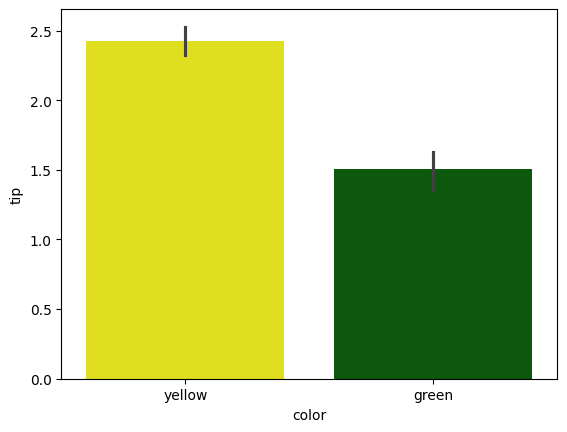

In [22]:
# graphical analysis of categorical
sns.barplot(x=df.color, y=df.tip,estimator='std',palette=["yellow",'darkgreen'])
plt.show()

/tmp/ipython-input-1942021526.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df.color, y=df.tip, estimator='mean',palette=["yellow",'darkgreen'])


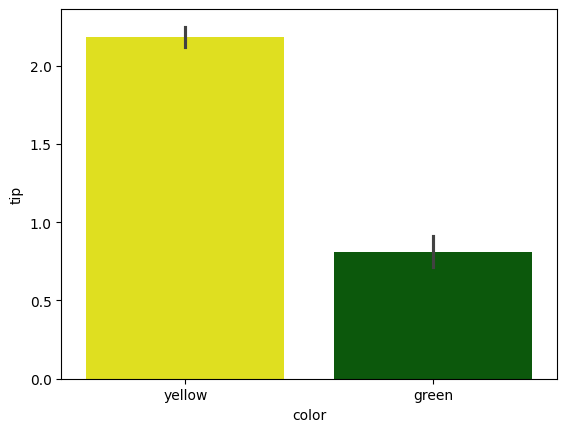

In [23]:
sns.barplot(x=df.color, y=df.tip, estimator='mean',palette=["yellow",'darkgreen'])
plt.show()

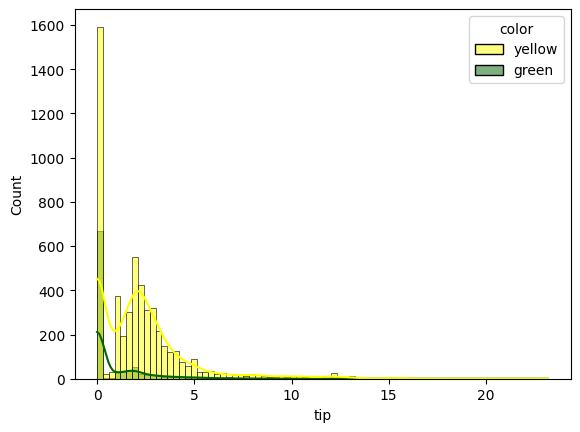

In [24]:
sns.histplot(x=df.tip, hue=df.color,kde= True,palette=["yellow",'darkgreen'])
plt.show()

### Hypotheses Testing:


#### T - Test
    . H0 : distribution of tip for yellow = ditribution of tip for green
    . H1 : distribution of tip for yellow != ditribution of tip for green

In [25]:
yellow_tip= df[df['color']=='Yellow']['tip']
green_tip= df[df['color']=='Green']['tip']

In [26]:
# Independent T-Test
from scipy import stats


t_stat, p_val = stats.ttest_ind(yellow_tip, green_tip)
print("Independent T-Test statistic:", t_stat)
print("P-value:", p_val)

if p_val < 0.05:
    print("Reject null hypothesis: tips differs by color")
else:
    print("Fail to reject null hypothesis: No significant tips difference by color")


Independent T-Test statistic: nan
P-value: nan
Fail to reject null hypothesis: No significant tips difference by color


/usr/local/lib/python3.12/dist-packages/scipy/_lib/deprecation.py:234: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  return f(*args, **kwargs)


In [27]:
# target column "tip"
'''
  tip is a numerical column
  and analyze with payment feature which is categorical column
'''

'\n  tip is a numerical column\n  and analyze with payment feature which is categorical column\n'

In [28]:
df.payment.value_counts()

,count
payment,
credit card,4546
cash,1795


/tmp/ipython-input-3758148356.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df.payment, y=df.tip,estimator='std',palette=["orange",'green'])
/tmp/ipython-input-3758148356.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df.payment, y=df.tip, estimator='mean',palette=["orange",'green'])


<Axes: xlabel='tip', ylabel='Count'>

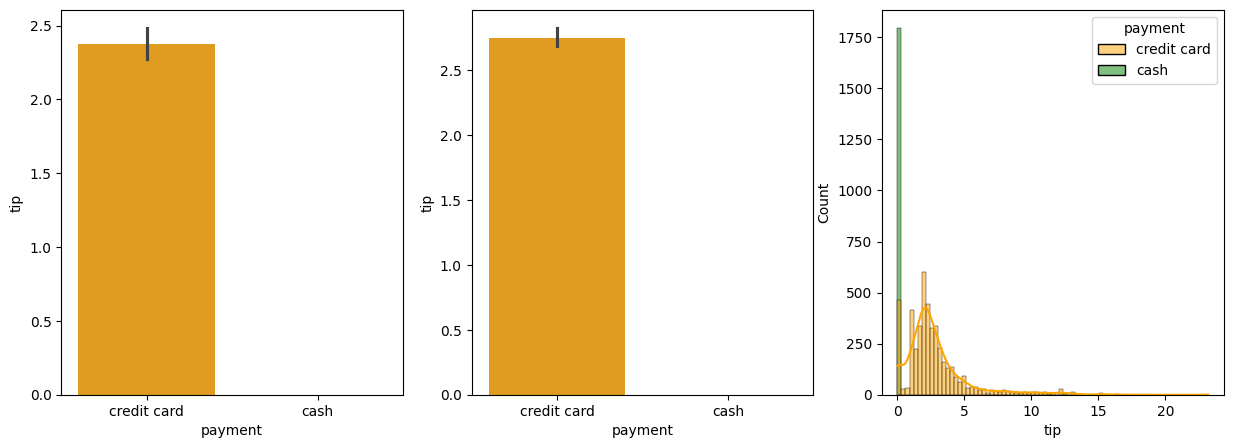

In [46]:
# graphical analysis of categorical
plt.figure(figsize=(15,5))

plt.subplot(1,3,1)
sns.barplot(x=df.payment, y=df.tip,estimator='std',palette=["orange",'green'])

plt.subplot(1,3,2)
sns.barplot(x=df.payment, y=df.tip, estimator='mean',palette=["orange",'green'])

plt.subplot(1,3,3)
sns.histplot(x=df.tip, hue=df.payment,kde= True,palette=["orange",'green'])

#### T - Test 2
    . H0 : distribution of tip for credit card = ditribution of tip for cash
    . H1 : distribution of tip for credit card != ditribution of tip for cash

In [51]:
credit_card_tip= df[df['payment']=='credit card']['tip']
cash_tip= df[df['payment']=='cash']['tip']

In [52]:
from scipy import stats


t_stats, p_vals = stats.ttest_ind(credit_card_tip, cash_tip)
print("Independent T-Test statistic:", t_stats)
print("P-value:", p_vals)

if p_vals < 0.05:
    print("Reject null hypothesis: tips differs by payment")
else:
    print("Fail to reject null hypothesis: No significant tips difference by payment")

Independent T-Test statistic: 49.09538452722153
P-value: 0.0
Reject null hypothesis: tips differs by payment


In [53]:
df.describe(include='object')

,color,payment,pickup_zone,dropoff_zone,pickup_borough,dropoff_borough
count,6341,6341,6341,6341,6341,6341
unique,2,2,194,203,4,5
top,yellow,credit card,Midtown Center,Upper East Side North,Manhattan,Manhattan
freq,5373,4546,227,244,5226,5172


In [54]:
df['pickup_borough'].value_counts()

,count
pickup_borough,
Manhattan,5226
Queens,638
Brooklyn,378
Bronx,99


/tmp/ipython-input-1729642190.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df,x=df['pickup_borough'],palette='rocket')


<Axes: xlabel='pickup_borough', ylabel='count'>

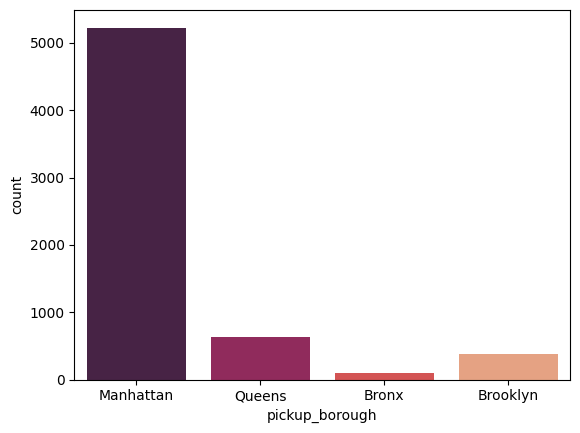

In [61]:
sns.countplot(data=df,x=df['pickup_borough'],palette='rocket')

/tmp/ipython-input-1304010712.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df['pickup_borough'],y=df['tip'],estimator='std',palette='rocket')
/tmp/ipython-input-1304010712.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df['pickup_borough'],y=df['tip'],estimator='mean',palette='rocket')


<Axes: xlabel='pickup_borough', ylabel='tip'>

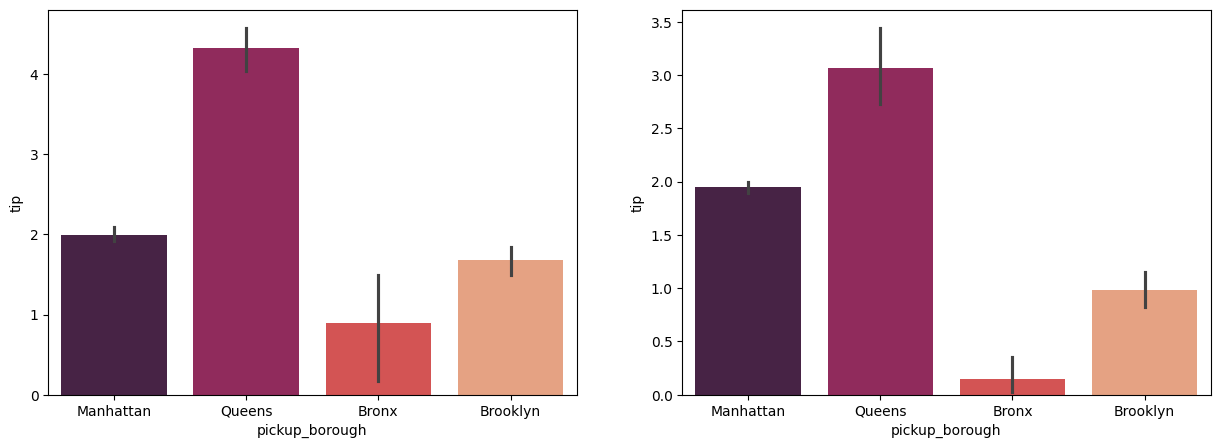

In [64]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.barplot(x=df['pickup_borough'],y=df['tip'],estimator='std',palette='rocket')
plt.subplot(1,2,2)
sns.barplot(x=df['pickup_borough'],y=df['tip'],estimator='mean',palette='rocket')

In [65]:
df.groupby('pickup_borough')['tip'].std()

,tip
pickup_borough,
Bronx,0.897261
Brooklyn,1.674487
Manhattan,1.997736
Queens,4.323951


<Axes: xlabel='tip', ylabel='Count'>

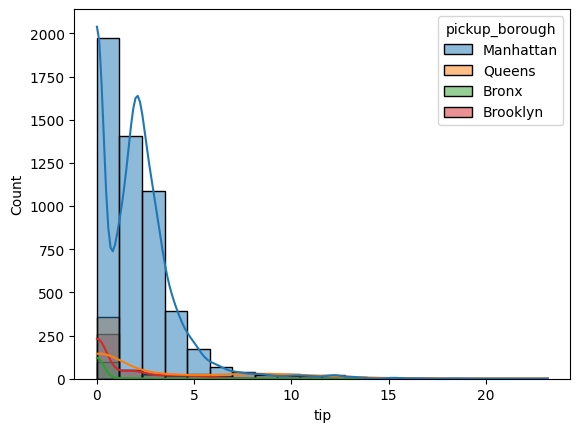

In [69]:
sns.histplot(hue=df['pickup_borough'],x=df['tip'],kde=True,bins=20)

#### Annova Test
    . H0 : distribution of tips is the same across all pickup_borough categories
    . H1 : At least one category has a different distribution of tip across pickup_borough categories

In [70]:
df['pickup_borough'].unique()

array(['Manhattan', 'Queens', 'Bronx', 'Brooklyn'], dtype=object)

In [71]:
manhattan_tip= df[df['pickup_borough']=='Manhattan']['tip']
queens_tip= df[df['pickup_borough']=='Queens']['tip']
bronx_tip=df['tip'][df['pickup_borough'] == 'Bronx']
brooklyn_tip=df['tip'][df['pickup_borough'] == 'Brooklyn']

In [73]:
# ANOVA Test
f_stat, p_val = stats.f_oneway(manhattan_tip,queens_tip,bronx_tip,brooklyn_tip)
print("ANOVA F-statistic:", f_stat)
print("P-value:", p_val)

if p_val < 0.05:
    print("Reject null hypothesis: tips differs by pickup_borough")
else:
    print("Fail to reject null hypothesis: No significant difference by pickup_borough")



ANOVA F-statistic: 91.5793383185057
P-value: 5.155109332422435e-58
Reject null hypothesis: tips differs by pickup_borough


#### Hypothese for Tukey test (for each pair of groups):
    . H0 : distribution of group1 = distribution of group2
    . H1 : distribution of group2 != distribution of group2

In [75]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd


# perform tukey HSD
tukey_results = pairwise_tukeyhsd(endog=df['tip'], groups=df['pickup_borough'], alpha=0.05)
print(tukey_results)

  Multiple Comparison of Means - Tukey HSD, FWER=0.05  
  group1    group2  meandiff p-adj lower  upper  reject
-------------------------------------------------------
    Bronx  Brooklyn   0.8305 0.008 0.1595 1.5015   True
    Bronx Manhattan    1.797   0.0  1.194    2.4   True
    Bronx    Queens   2.9179   0.0 2.2759 3.5599   True
 Brooklyn Manhattan   0.9665   0.0 0.6499  1.283   True
 Brooklyn    Queens   2.0873   0.0 1.7016 2.4731   True
Manhattan    Queens   1.1209   0.0 0.8716 1.3701   True
-------------------------------------------------------


In [76]:
df['dropoff_borough'].value_counts()

,count
dropoff_borough,
Manhattan,5172
Queens,534
Brooklyn,497
Bronx,136
Staten Island,2


/tmp/ipython-input-1649707523.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df,x=df['dropoff_borough'],palette='rocket')


<Axes: xlabel='dropoff_borough', ylabel='count'>

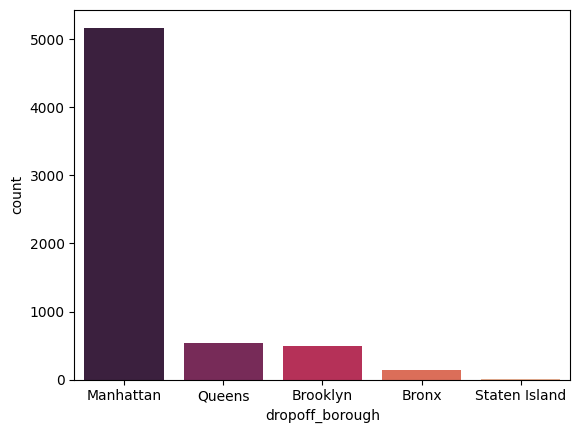

In [77]:
sns.countplot(data=df,x=df['dropoff_borough'],palette='rocket')

/tmp/ipython-input-1038071405.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df['dropoff_borough'],y=df['tip'],estimator='std',palette='rocket')
/tmp/ipython-input-1038071405.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df['dropoff_borough'],y=df['tip'],estimator='mean',palette='rocket')


<Axes: xlabel='tip', ylabel='Count'>

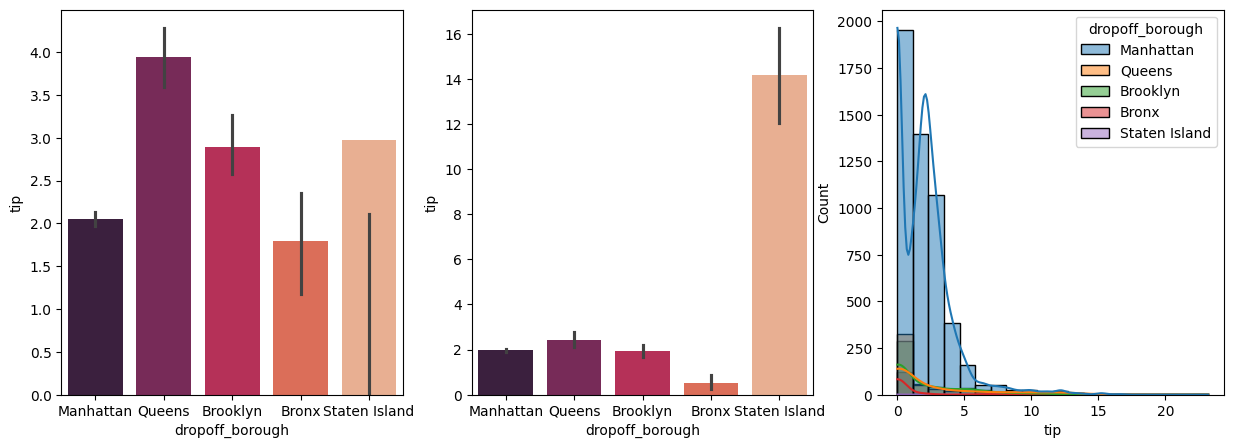

In [78]:
plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
sns.barplot(x=df['dropoff_borough'],y=df['tip'],estimator='std',palette='rocket')
plt.subplot(1,3,2)
sns.barplot(x=df['dropoff_borough'],y=df['tip'],estimator='mean',palette='rocket')
plt.subplot(1,3,3)
sns.histplot(hue=df['dropoff_borough'],x=df['tip'],kde=True,bins=20)

#### Annova Test 2
    . H0 : distribution of tips is the same across all dropoff_borough categories
    . H1 : At least one category has a different distribution of tip across dropoff_borough categories

In [79]:
df['dropoff_borough'].unique()

array(['Manhattan', 'Queens', 'Brooklyn', 'Bronx', 'Staten Island'],
      dtype=object)

In [80]:
manhattan_tip1= df[df['dropoff_borough']=='Manhattan']['tip']
queens_tip1= df[df['dropoff_borough']=='Queens']['tip']
bronx_tip1=df['tip'][df['dropoff_borough'] == 'Bronx']
brooklyn_tip1=df['tip'][df['dropoff_borough'] == 'Brooklyn']
staten_tip1=df['tip'][df['dropoff_borough'] == 'Staten Island']

In [81]:
# ANOVA Test
f_stat, p_val = stats.f_oneway(manhattan_tip1,queens_tip1,bronx_tip1,brooklyn_tip1,staten_tip1)
print("ANOVA F-statistic:", f_stat)
print("P-value:", p_val)

if p_val < 0.05:
    print("Reject null hypothesis: tips differs by dropoff_borough")
else:
    print("Fail to reject null hypothesis: No significant difference by dropoff_borough")



ANOVA F-statistic: 31.42417796696829
P-value: 5.87859571331583e-26
Reject null hypothesis: tips differs by dropoff_borough


#### Hypothese for Tukey test (for each pair of groups):
    . H0 : distribution of group1 = distribution of group2
    . H1 : distribution of group2 != distribution of group2

In [82]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# perform tukey HSD
tukey_results = pairwise_tukeyhsd(endog=df['tip'], groups=df['dropoff_borough'], alpha=0.05)
print(tukey_results)

     Multiple Comparison of Means - Tukey HSD, FWER=0.05      
  group1      group2    meandiff p-adj   lower   upper  reject
--------------------------------------------------------------
    Bronx      Brooklyn   1.3869    0.0  0.7691  2.0046   True
    Bronx     Manhattan   1.4296    0.0  0.8751  1.9842   True
    Bronx        Queens   1.8873    0.0  1.2742  2.5005   True
    Bronx Staten Island  13.6303    0.0  9.0833 18.1773   True
 Brooklyn     Manhattan   0.0427 0.9952 -0.2571  0.3425  False
 Brooklyn        Queens   0.5004 0.0055  0.1026  0.8983   True
 Brooklyn Staten Island  12.2434    0.0  7.7204 16.7664   True
Manhattan        Queens   0.4577 0.0002  0.1675  0.7479   True
Manhattan Staten Island  12.2007    0.0  7.6859 16.7154   True
   Queens Staten Island   11.743    0.0  7.2206 16.2653   True
--------------------------------------------------------------


In [83]:
df['pickup_zone'].value_counts()

,count
pickup_zone,
Midtown Center,227
Penn Station/Madison Sq West,209
Clinton East,208
Upper East Side South,208
Midtown East,196
...,...
Ozone Park,1
Glendale,1
Woodlawn/Wakefield,1


In [84]:
df['dropoff_zone'].value_counts()

,count
dropoff_zone,
Upper East Side North,244
Murray Hill,217
Midtown Center,215
Midtown East,175
Upper East Side South,173
...,...
Queensboro Hill,1
Homecrest,1
Madison,1


<Axes: xlabel='dropoff_zone', ylabel='count'>

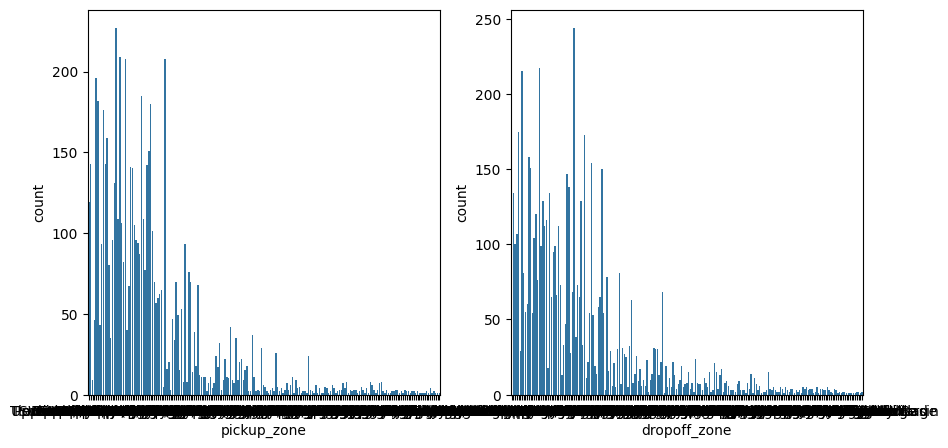

In [88]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.countplot(x=df['pickup_zone'])
plt.subplot(1,2,2)
sns.countplot(x=df['dropoff_zone'])

#### Annova Test 3
    . H0 : distribution of tips is the same across all pickup_zone categories
    . H1 : At least one category has a different distribution of tip across pickup_zone categories

In [89]:
# ANOVA Test
categories = [group['tip'].values for name,group in df.groupby('pickup_zone')]
f_stat, p_val = stats.f_oneway(*categories)
print("ANOVA F-statistic:", f_stat)
print("P-value:", p_val)

if p_val < 0.05:
    print("Reject null hypothesis: tips differs by pickup_zone")
else:
    print("Fail to reject null hypothesis: No significant difference by pickup_zone")


ANOVA F-statistic: 7.563376210961916
P-value: 7.892434822136223e-169
Reject null hypothesis: tips differs by pickup_zone


#### Annova Test 3
    . H0 : distribution of tips is the same across all dropoff_zone categories
    . H1 : At least one category has a different distribution of tip across dropoff_zone categories


In [90]:
# ANOVA Test
categories = [group['tip'].values for name,group in df.groupby('dropoff_zone')]
f_stat, p_val = stats.f_oneway(*categories)
print("ANOVA F-statistic:", f_stat)
print("P-value:", p_val)

if p_val < 0.05:
    print("Reject null hypothesis: tips differs by dropoff_zone")
else:
    print("Fail to reject null hypothesis: No significant difference by dropoff_zone")


ANOVA F-statistic: 5.76903467327541
P-value: 1.3107168403745948e-120
Reject null hypothesis: tips differs by dropoff_zone


In [91]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6341 entries, 0 to 6340
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   pickup           6341 non-null   datetime64[ns]
 1   dropoff          6341 non-null   datetime64[ns]
 2   passengers       6341 non-null   int64         
 3   distance         6341 non-null   float64       
 4   fare             6341 non-null   float64       
 5   tip              6341 non-null   float64       
 6   tolls            6341 non-null   float64       
 7   total            6341 non-null   float64       
 8   color            6341 non-null   object        
 9   payment          6341 non-null   object        
 10  pickup_zone      6341 non-null   object        
 11  dropoff_zone     6341 non-null   object        
 12  pickup_borough   6341 non-null   object        
 13  dropoff_borough  6341 non-null   object        
dtypes: datetime64[ns](2), float64(5), int64(

<Axes: xlabel='distance', ylabel='Count'>

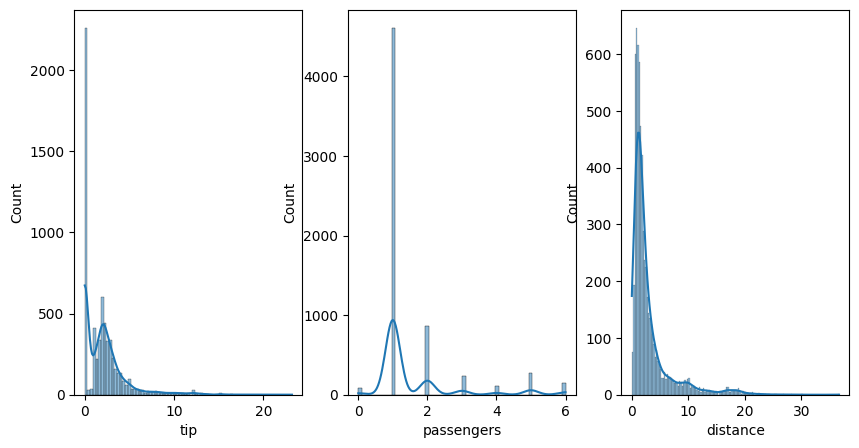

In [105]:
plt.figure(figsize=(10,5))
plt.subplot(1,3,1)
sns.histplot(df['tip'],kde=True)
plt.subplot(1,3,2)
sns.histplot(df['passengers'],kde=True)
plt.subplot(1,3,3)
sns.histplot(df['distance'],kde=True)


<Axes: xlabel='tip', ylabel='passengers'>

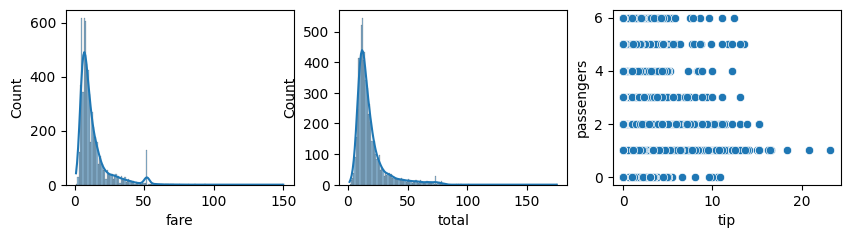

In [104]:
plt.figure(figsize=(10,5))
plt.subplot(2,3,4)
sns.histplot(df['fare'],kde=True)
plt.subplot(2,3,5)
sns.histplot(df['total'],kde=True)
plt.subplot(2,3,6)
sns.scatterplot(data=df,x=df['tip'],y=df['passengers'])


#### Hypothese for correlation for numberic variables:
    . H0 : correlation is zero
    . H1 : There is significant correlation (not zero)

In [ ]:
r, p_val = stats.spearmanr(df['tip'], df['passengers'])
print("Spearman's rank correlation coefficient:", r)
print("P-value:", p_val)

alpha = 0.5
if p_val < alpha :
    print("Reject null hypothesis: There is significant correlation")
else:
    print("Fail to reject null hypothesis: There is no significant correlationa")

<Axes: xlabel='tip', ylabel='fare'>

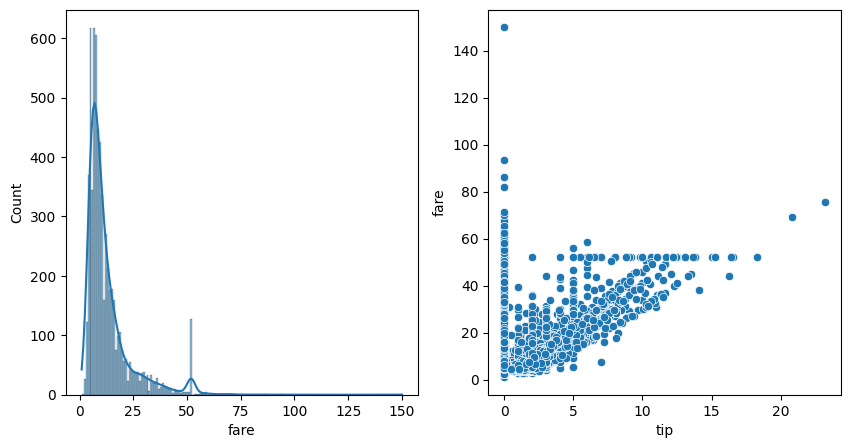

In [107]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.histplot(df['fare'],kde=True)
plt.subplot(1,2,2)
sns.scatterplot(data=df,x=df['tip'],y=df['fare'])

In [108]:
r, p_val = stats.spearmanr(df['tip'], df['fare'])
print("Spearman's rank correlation coefficient:", r)
print("P-value:", p_val)

alpha = 0.5
if p_val < alpha :
    print("Reject null hypothesis: There is significant correlation")
else:
    print("Fail to reject null hypothesis: There is no significant correlationa")

Spearman's rank correlation coefficient: 0.310254279563729
P-value: 1.5556730728881364e-141
Reject null hypothesis: There is significant correlation


<Axes: xlabel='tip', ylabel='distance'>

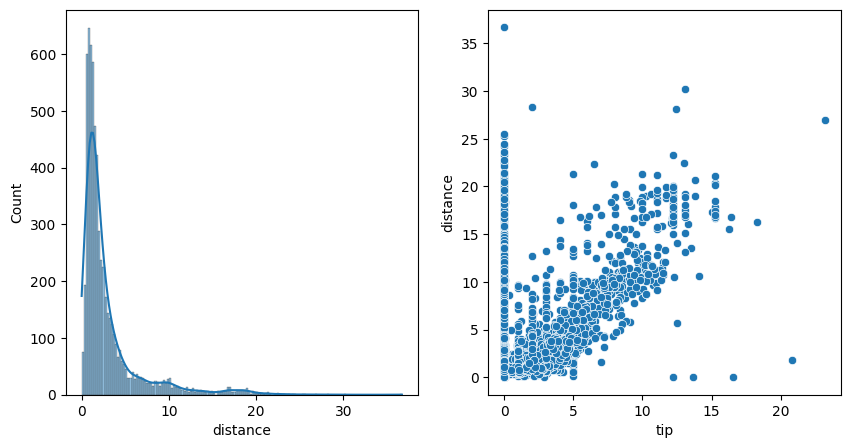

In [109]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.histplot(df['distance'],kde=True)
plt.subplot(1,2,2)
sns.scatterplot(data=df,x=df['tip'],y=df['distance'])

In [110]:
r, p_val = stats.spearmanr(df['tip'], df['distance'])
print("Spearman's rank correlation coefficient:", r)
print("P-value:", p_val)

alpha = 0.5
if p_val < alpha :
    print("Reject null hypothesis: There is significant correlation")
else:
    print("Fail to reject null hypothesis: There is no significant correlationa")

Spearman's rank correlation coefficient: 0.29265085410043695
P-value: 1.9411181331374707e-125
Reject null hypothesis: There is significant correlation


<Axes: xlabel='tip', ylabel='total'>

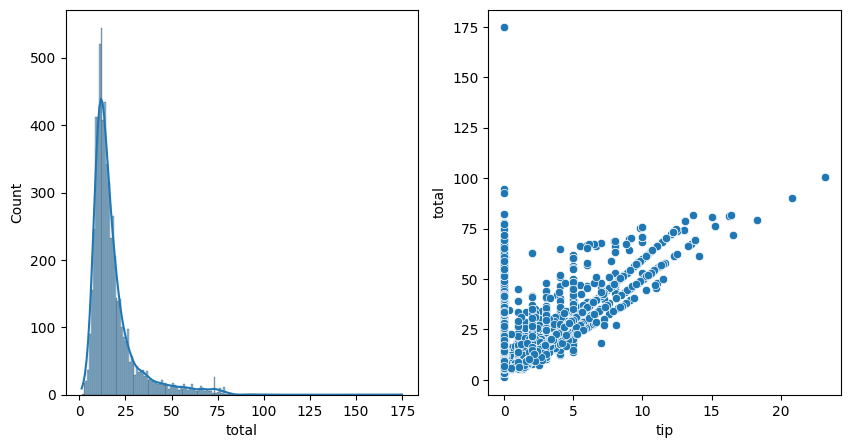

In [111]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.histplot(df['total'],kde=True)
plt.subplot(1,2,2)
sns.scatterplot(data=df,x=df['tip'],y=df['total'])

In [114]:
r, p_val = stats.spearmanr(df['tip'], df['distance'])
print("Spearman's rank correlation coefficient:", r)
print("P-value:", p_val)

alpha = 0.5
if p_val < alpha :
    print("Reject null hypothesis: There is significant correlation")
else:
    print("Fail to reject null hypothesis: There is no significant correlation")

Spearman's rank correlation coefficient: 0.29265085410043695
P-value: 1.9411181331374707e-125
Reject null hypothesis: There is significant correlation


<Axes: xlabel='tip', ylabel='tolls'>

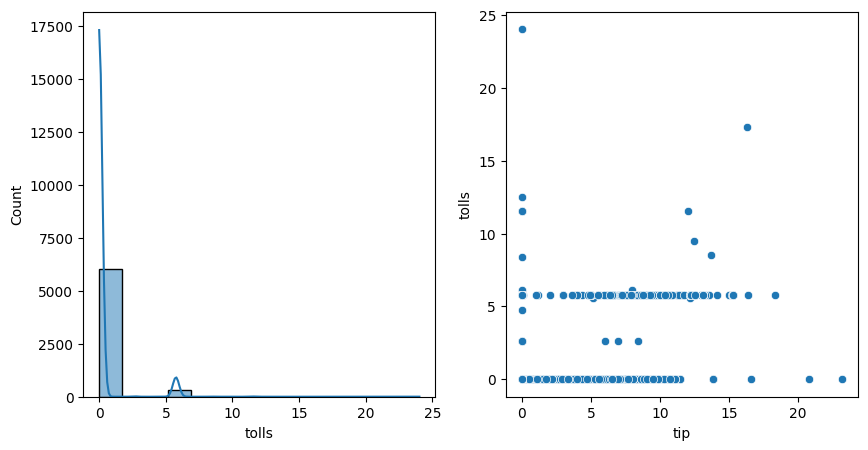

In [113]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.histplot(df['tolls'],kde=True)
plt.subplot(1,2,2)
sns.scatterplot(data=df,x=df['tip'],y=df['tolls'])

In [115]:
r, p_val = stats.spearmanr(df['tip'], df['tolls'])
print("Spearman's rank correlation coefficient:", r)
print("P-value:", p_val)

alpha = 0.5
if p_val < alpha :
    print("Reject null hypothesis: There is significant correlation")
else:
    print("Fail to reject null hypothesis: There is no significant correlation")

Spearman's rank correlation coefficient: 0.175380002891528
P-value: 5.643276180955435e-45
Reject null hypothesis: There is significant correlation


In [117]:
nm = df[['fare','tip','total','distance','passengers']]

<Axes: >

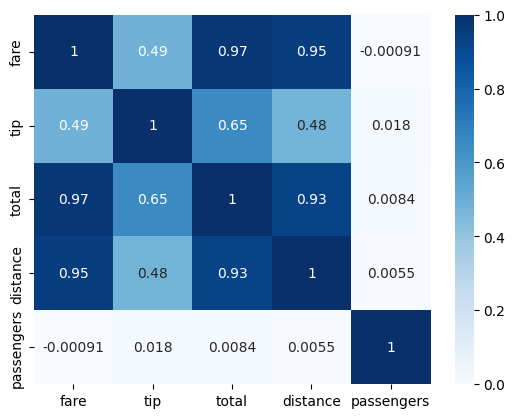

In [120]:
sns.heatmap(nm.corr(),annot=True, cmap = 'Blues')